# Анализ графов

## Граф

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Sample_graph.svg/131px-Sample_graph.svg.png'>

### Неориентированный
Неориентированный граф $G$ — это упорядоченная пара $G:=(V,E)$, где $V$ — это непустое множество вершин или узлов, а $E$ — множество пар (в случае неориентированного графа — неупорядоченных) вершин, называемых рёбрами.

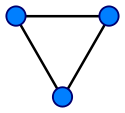

### Ориентированный
Ориентированный граф (сокращённо орграф) $G$ — это упорядоченная пара $G:=(V,A)$, где $V$ — непустое множество вершин или узлов, и $A$ — множество (упорядоченных) пар различных вершин, называемых дугами или ориентированными рёбрами.

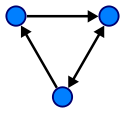

### Взвешенный
Взвешенный граф — граф, каждому ребру которого поставлено в соответствие некое значение (вес ребра)

## Примеры графов

Дружба в социальной сети (ненаправленный граф без весов)  
Подписка на события в социальной сети (направленный граф без весов)  
Цитирование в статьях (направленный граф без весов)  
Переписка - емейлы, сообщения, смс (направленный взвешенный граф)  
Страницы в web (направленный взвешенный граф)   
Совместная игра актеров в фильмах https://en.wikipedia.org/wiki/Co-stardom_network  
Зависимости пакетов Python  http://kgullikson88.github.io/blog/Javascript/PypiGraph/Requirements_clipped/network/index.html  



## Датасеты

1. Набор датасетов от Стэнфорда для изучения алгоритмов на графах
https://snap.stanford.edu/data/  
2. Набор датасетов с реальными данными
https://icon.colorado.edu/#!/networks


## Задачи

Поиск важнейших нод в графе

* лидеры мнений
* поиск важных нод для обеспечения отказоустойчивости

Кластеризация нод в графе. Возможно выделение психологических портретов.

Поиск сообществ

* работа с сообществами

Предсказание ребер - рекомендации  
Поиск клик в графах - поиск полносвязных подграфов  


https://www.youtube.com/watch?v=mm2u9RKwgsY  

- обход графа
- поиск кратчайшего пути
- поиск максимального потока
- эйлерова цикла
- поиск гамильтонова цикла
- выделение сообществ
- поиск клик
- важность

## Граф взаимодействий в Star Wars

Данные из эпизодов Star Wars


http://evelinag.com/blog/2015/12-15-star-wars-social-network/

In [10]:
import json
import requests
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 12]

In [11]:
import networkx as nx
from networkx.readwrite import json_graph
from networkx.algorithms import community

### Загрузка графа

In [12]:
interactions = json.loads(requests.get('https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-full-interactions.json').content)

In [13]:
interactions['nodes'][:10]

[{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'},
 {'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'},
 {'name': 'PK-4', 'value': 3, 'colour': '#808080'},
 {'name': 'TC-14', 'value': 4, 'colour': '#808080'},
 {'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'},
 {'name': 'DOFINE', 'value': 3, 'colour': '#808080'},
 {'name': 'RUNE', 'value': 10, 'colour': '#808080'},
 {'name': 'TEY HOW', 'value': 4, 'colour': '#808080'},
 {'name': 'EMPEROR', 'value': 51, 'colour': '#191970'},
 {'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'}]

In [14]:
interactions['links'][:10]

[{'source': 1, 'target': 0, 'value': 1},
 {'source': 2, 'target': 3, 'value': 1},
 {'source': 4, 'target': 3, 'value': 1},
 {'source': 0, 'target': 3, 'value': 1},
 {'source': 4, 'target': 0, 'value': 26},
 {'source': 1, 'target': 3, 'value': 1},
 {'source': 5, 'target': 1, 'value': 1},
 {'source': 5, 'target': 3, 'value': 1},
 {'source': 1, 'target': 6, 'value': 8},
 {'source': 6, 'target': 7, 'value': 2}]

In [59]:
interactions['directed'] = False
interactions['multigraph'] = False
interactions['graph'] = {}

In [60]:
G = json_graph.node_link_graph(interactions)

In [61]:
G

In [62]:
G.number_of_nodes()

110

In [63]:
G.number_of_edges()

398

### Обращение к вершинам

In [64]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109))

In [65]:
G.nodes()[0]

{'name': 'QUI-GON', 'value': 61, 'colour': '#4f4fb1'}

### Получение соседей вершины

In [69]:
for nbr in G.neighbors(0):
    print(G.nodes[nbr])

{'name': 'NUTE GUNRAY', 'value': 24, 'colour': '#808080'}
{'name': 'TC-14', 'value': 4, 'colour': '#808080'}
{'name': 'OBI-WAN', 'value': 147, 'colour': '#48D1CC'}
{'name': 'JAR JAR', 'value': 41, 'colour': '#9a9a00'}
{'name': 'BOSS NASS', 'value': 4, 'colour': '#808080'}
{'name': 'SIO BIBBLE', 'value': 8, 'colour': '#808080'}
{'name': 'CAPTAIN PANAKA', 'value': 19, 'colour': '#808080'}
{'name': 'PADME', 'value': 74, 'colour': '#DDA0DD'}
{'name': 'RIC OLIE', 'value': 11, 'colour': '#808080'}
{'name': 'WATTO', 'value': 8, 'colour': '#808080'}
{'name': 'ANAKIN', 'value': 131, 'colour': '#ce3b59'}
{'name': 'SEBULBA', 'value': 3, 'colour': '#808080'}
{'name': 'JIRA', 'value': 3, 'colour': '#808080'}
{'name': 'SHMI', 'value': 11, 'colour': '#808080'}
{'name': 'KITSTER', 'value': 4, 'colour': '#808080'}
{'name': 'WALD', 'value': 3, 'colour': '#808080'}
{'name': 'C-3PO', 'value': 150, 'colour': '#FFD700'}
{'name': 'JABBA', 'value': 7, 'colour': '#808080'}
{'name': 'GREEDO', 'value': 3, 'colou

## Обращение к ребрам 

In [70]:
G.edges()[0, 3]

{'value': 1}

## Как граф хранится в памяти?

### Способ 1: матрица смежности

![https://mathworld.wolfram.com/images/eps-gif/AdjacencyMatrix_1002.gif](https://mathworld.wolfram.com/images/eps-gif/AdjacencyMatrix_1002.gif)


## 

In [74]:
A = nx.adjacency_matrix(G)
A.todense()

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [75]:
A.shape

(110, 110)

### Способ 2: список смежности

![adjacency_list.png](http://lagodiuk.github.io/images/adj_lists/img_2.png)

In [76]:
G.adj[0]

AtlasView({1: {'value': 1}, 3: {'value': 1}, 4: {'value': 26}, 11: {'value': 22}, 13: {'value': 2}, 10: {'value': 2}, 9: {'value': 9}, 14: {'value': 16}, 15: {'value': 2}, 16: {'value': 6}, 17: {'value': 22}, 18: {'value': 2}, 19: {'value': 2}, 20: {'value': 8}, 23: {'value': 2}, 24: {'value': 2}, 21: {'value': 1}, 26: {'value': 1}, 27: {'value': 1}, 8: {'value': 1}, 28: {'value': 1}, 29: {'value': 2}, 30: {'value': 2}, 31: {'value': 3}, 32: {'value': 1}, 33: {'value': 1}})

In [77]:
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['value']
        print('(%d, %d, %.3f)' % (n, nbr, wt))
        break
    break

(0, 1, 1.000)


## Рисование графов

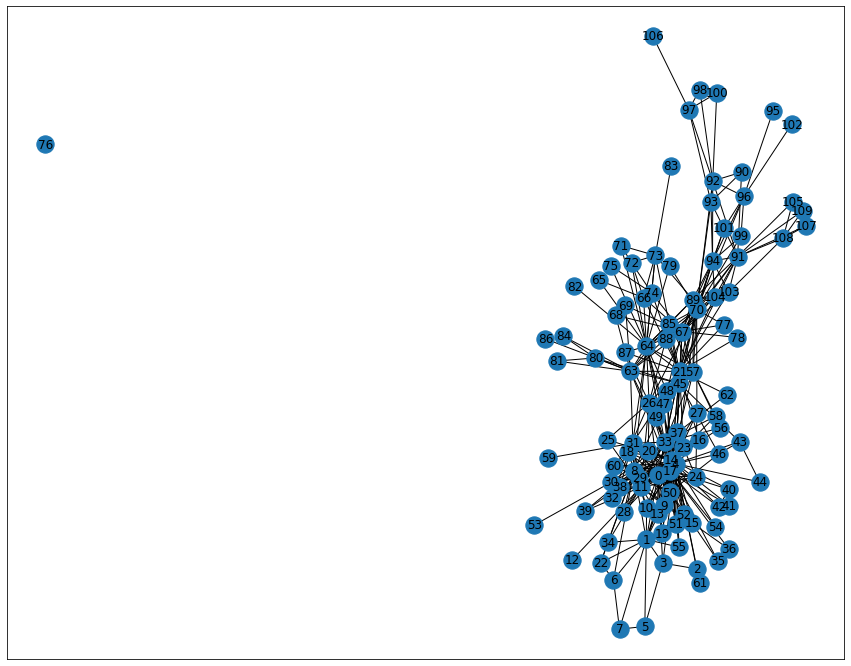

In [79]:
nx.draw_networkx(G)

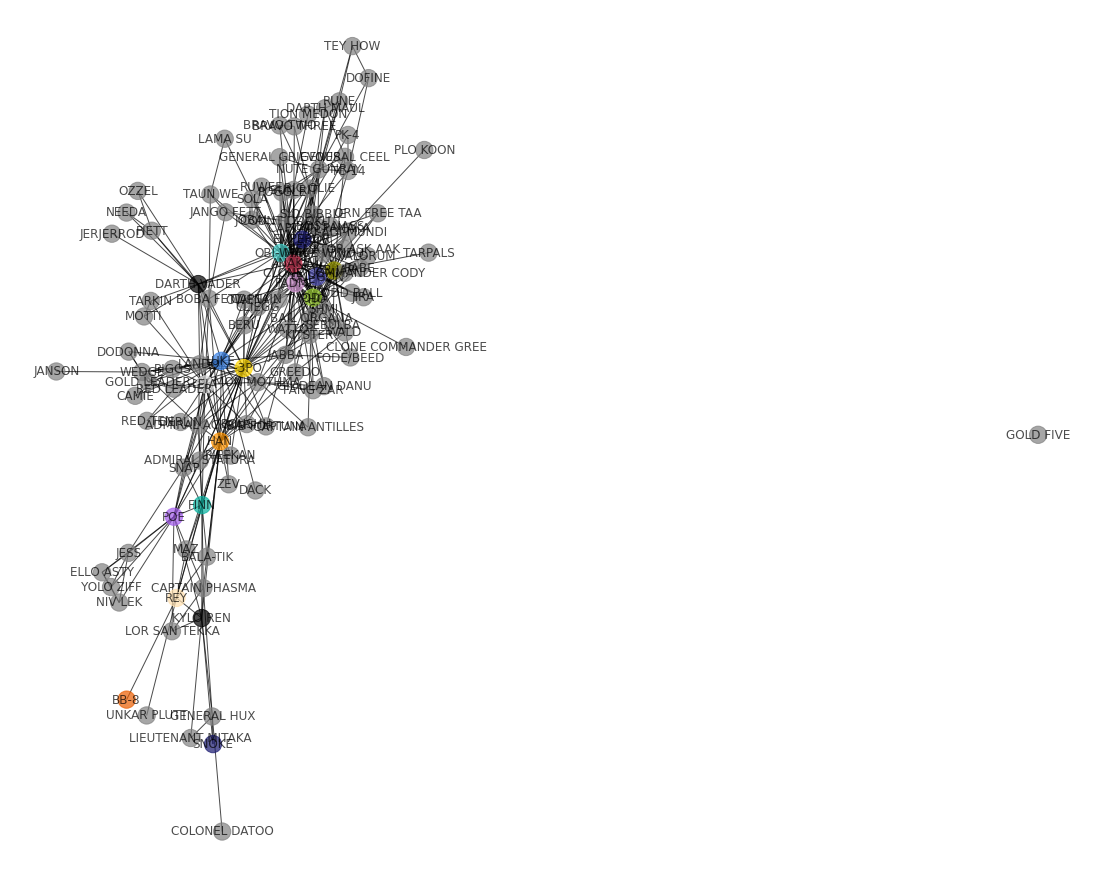

In [106]:
clrs = np.array([n[1]['colour'] for n in G.nodes.data()])
nx.draw_spring(G, node_color=clrs, with_labels=True, alpha=0.7, labels={n[0]: n[1]['name'] for n in G.nodes.data()})

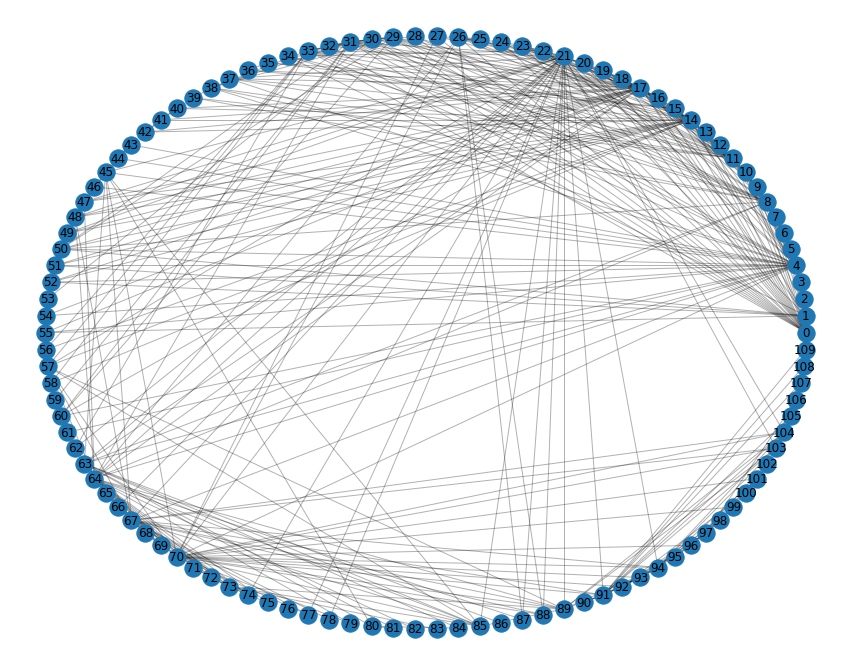

In [103]:
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos, alpha=0.3)
nx.draw_networkx_labels(G, pos=pos)
plt.axis('off')
plt.show()

### Связные компоненты
Компонента связности графа $G$ (или просто компонента графа  $G$) — максимальный (по включению) связный подграф графа  $G$.

Другими словами, это подграф  $G(U)$, порождённый множеством  $U \subseteq V(G)$ вершин, в котором для любой пары вершин $u, v \in U$ в графе  $G$ существует $(u,v)$-цепь и для любой пары вершин $u\in U$, $v\notin U$ не существует $(u,v)$-цепи.

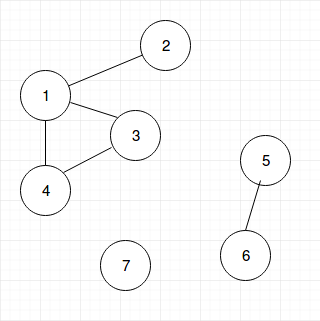

In [104]:
for g_component in nx.connected_components(G):
    print(g_component)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109}
{76}


In [105]:
G.nodes()[76]

{'name': 'GOLD FIVE', 'value': 8, 'colour': '#808080'}

## Обход графа

DFS: https://www.cs.usfca.edu/~galles/visualization/DFS.html <br>
BFS: https://www.cs.usfca.edu/~galles/visualization/BFS.html

http://graphonline.ru/en/

In [95]:
for i, (from_node, to_node) in enumerate(nx.dfs_edges(G, source=0)):
    print(from_node, to_node)
    if i >= 10:
        break

0 1
1 3
3 2
2 4
4 11
11 12
11 13
13 14
14 9
9 8
8 10


In [93]:
edges = nx.bfs_edges(G, 0)
nodes = [0] + [v for u, v in edges]
nodes[:10]

[0, 1, 3, 4, 11, 13, 10, 9, 14, 15]

## Центральность (centrality) - степень важности вершины

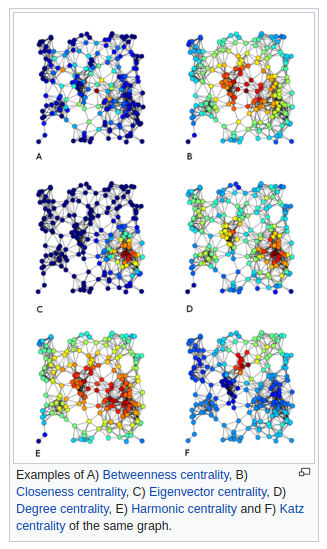

### Degree centrality - чем больше соседей, тем важнее

Смысл этой самой простой меры основан на допущении, что тот, кто обладает большим количеством связей (отношений) с другими, занимает центральное положение в локальной общности. Иными словами, центральным можно считать того, кто связан с наибольшим числом членов группы. DС - это отношение количества связей определенного узла (в нашем случае журнала) к общему количеству других узлов.


In [100]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

ANAKIN 0.3761467889908257
OBI-WAN 0.3211009174311927
PADME 0.30275229357798167
C-3PO 0.30275229357798167
QUI-GON 0.23853211009174313
JAR JAR 0.22018348623853212
LUKE 0.22018348623853212
HAN 0.21100917431192662
EMPEROR 0.2018348623853211
LEIA 0.1926605504587156


In [108]:
degree_centrality.values()

dict_values([0.23853211009174313, 0.14678899082568808, 0.01834862385321101, 0.045871559633027525, 0.3211009174311927, 0.027522935779816515, 0.03669724770642202, 0.027522935779816515, 0.2018348623853211, 0.08256880733944955, 0.07339449541284404, 0.22018348623853212, 0.009174311926605505, 0.05504587155963303, 0.30275229357798167, 0.06422018348623854, 0.045871559633027525, 0.3761467889908257, 0.05504587155963303, 0.027522935779816515, 0.07339449541284404, 0.30275229357798167, 0.03669724770642202, 0.07339449541284404, 0.045871559633027525, 0.027522935779816515, 0.11009174311926606, 0.03669724770642202, 0.03669724770642202, 0.11926605504587157, 0.08256880733944955, 0.14678899082568808, 0.045871559633027525, 0.14678899082568808, 0.03669724770642202, 0.027522935779816515, 0.027522935779816515, 0.045871559633027525, 0.06422018348623854, 0.027522935779816515, 0.03669724770642202, 0.03669724770642202, 0.03669724770642202, 0.03669724770642202, 0.01834862385321101, 0.08256880733944955, 0.036697247

In [166]:
pos=nx.spring_layout(G, k=5*1/np.sqrt(len(G.nodes())))

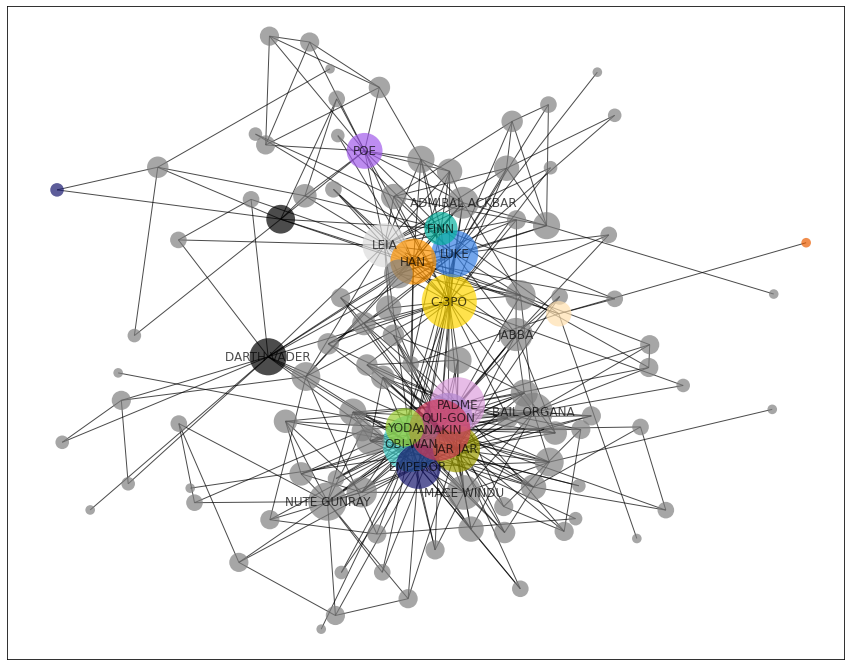

In [167]:
th = degree_centrality_counts.most_common(20)[-1][1]
nx.draw_networkx(
    G, 
    node_color=clrs, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if degree_centrality[n[0]] > th}, 
    node_size=np.array(list(degree_centrality.values())) * 10000,
    linewidths=0.01,
    pos=pos,
)

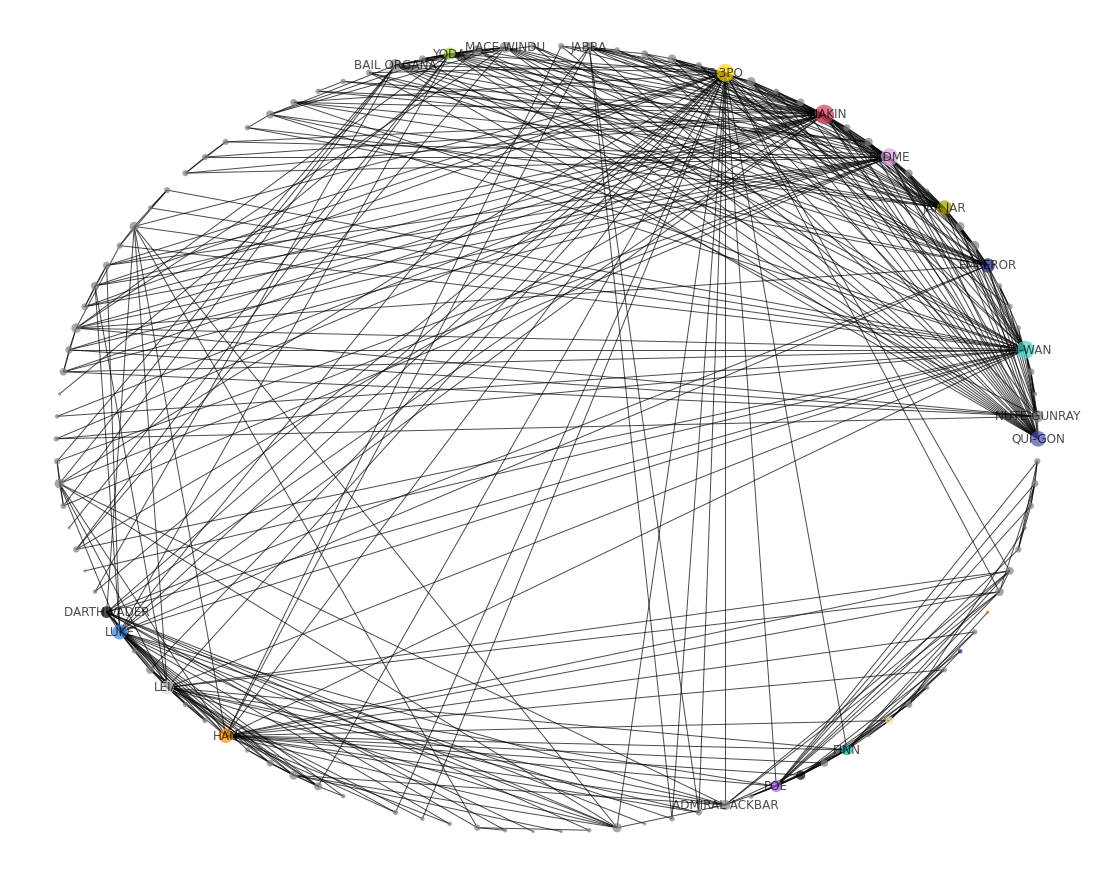

In [168]:
nx.draw_shell(
    G, 
    node_color=clrs, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if degree_centrality[n[0]] > th}, 
    node_size=np.array(list(degree_centrality.values())) * 1000,
    linewidths=0.1,
)

### Betweenness centrality (Степень посредничества)
позволяет ранжировать вершины в графе, то есть оценить их важность с точки зрения количества проходящих через них путей.


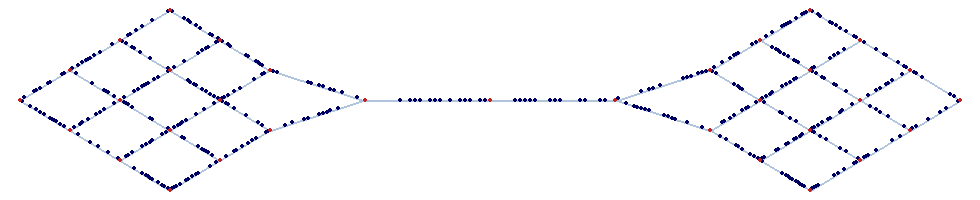


На иллюстрации между каждой парой вершин в графе курсирует по одной частице; частицы двигаются только по кратчайшим путям. Каждый раз, когда через вершину графа проходит какая-либо частица, счетчик вершины увеличивается. Чем больше значение счетчика, тем больше радиус вершины, который характеризует "центральность" вершины.



Степень посредничества — это мера центральности в графе, основанная на кратчайших путях. Для любой пары вершин в связном графе существует по меньшей мере один путь между вершинами, для которого минимально либо число рёбер, по которым путь проходит, либо сумма весов этих рёбер.

In [169]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

OBI-WAN 0.21289741830262351
C-3PO 0.1926808487468285
HAN 0.1812153961936558
ANAKIN 0.1621708391273783
LUKE 0.137821617635291
DARTH VADER 0.0880518038555187
POE 0.08361809147724517
EMPEROR 0.07433337936695311
PADME 0.06946928856235446
KYLO REN 0.05646104121849159


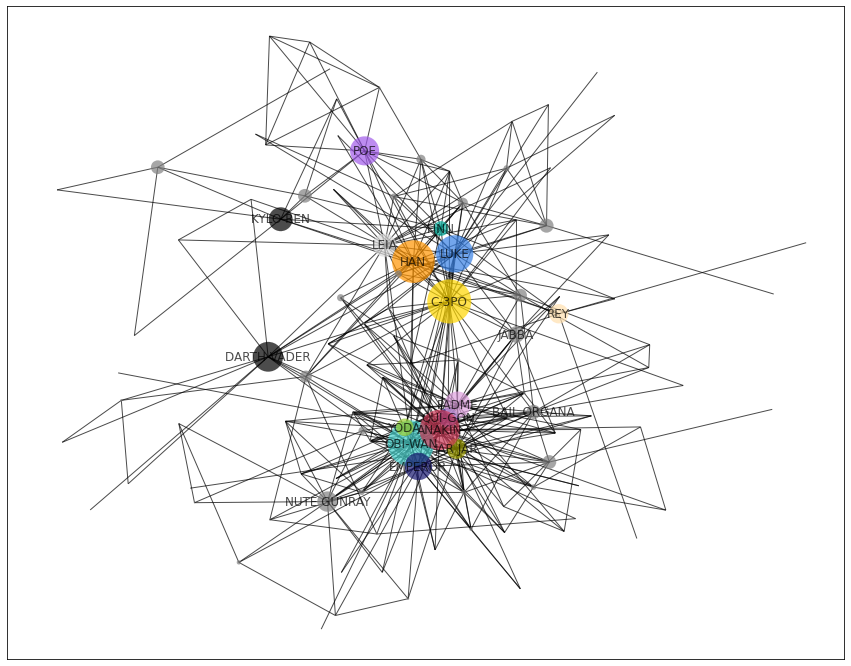

In [170]:
th = betweenness_centrality_counts.most_common(20)[-1][1]
nx.draw_networkx(
    G, 
    node_color=clrs, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if betweenness_centrality[n[0]] > th}, 
    node_size=np.array(list(betweenness_centrality.values())) * 10000,
    linewidths=0.1,
    pos=pos,
)

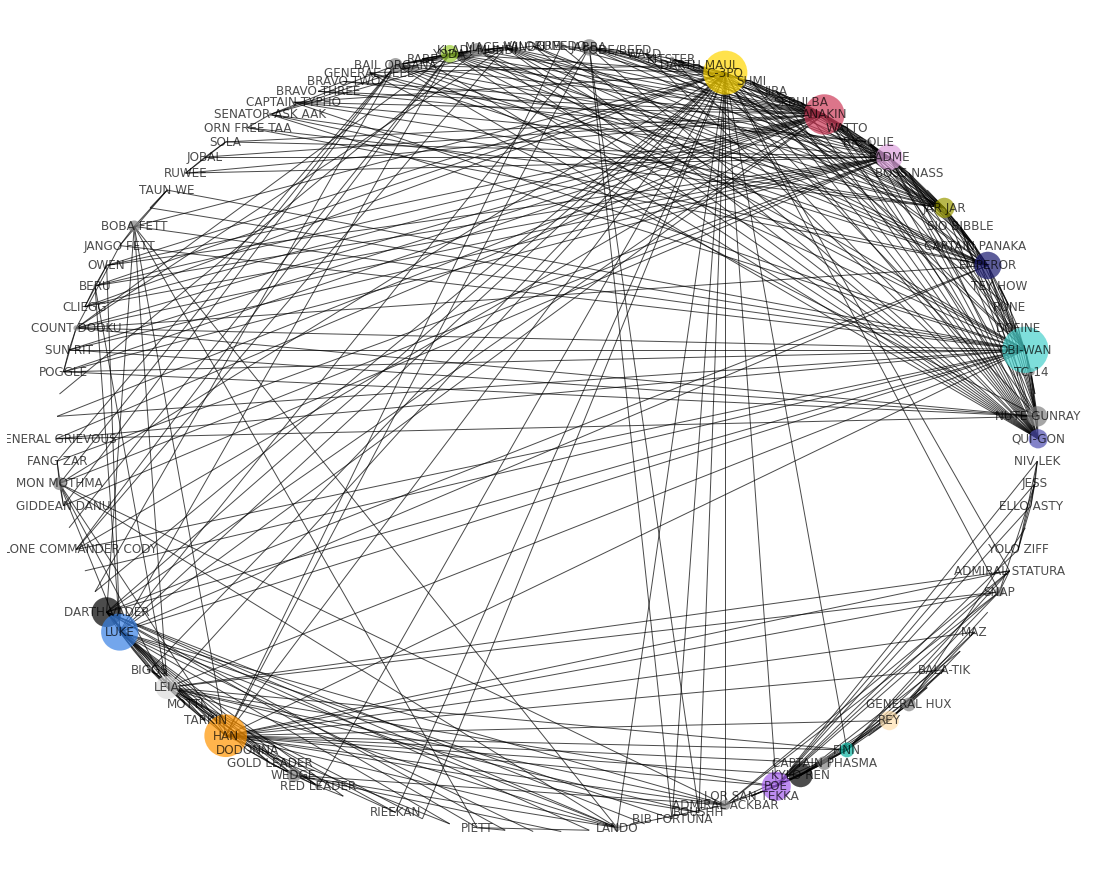

In [175]:
nx.draw_shell(
    G, 
    node_color=clrs, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if degree_centrality[n[0]] > th}, 
    node_size=np.array(list(betweenness_centrality.values())) * 10000,
    linewidths=0.1,
)

### Closeness centrality (Степень близости)

Центральность по близости выражает, насколько близко узел расположен к остальным узлам сети. 


Степень близости узла — это мера центральности в сети, вычисляемая как обратная величина суммы длин кратчайших путей между узлом и всеми другими узлами графа. Таким образом, чем более централен узел, тем ближе он ко всем другим узлам.

In [176]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_counts = Counter(closeness_centrality)
for k, v in closeness_centrality_counts.most_common(10):
    print(G.nodes[k]['name'], v)

OBI-WAN 0.5515936820202403
C-3PO 0.5487649964714185
ANAKIN 0.5377345442810383
LUKE 0.5144671841919549
HAN 0.5047602561883331
EMPEROR 0.4908677720730579
PADME 0.48202330771138113
DARTH VADER 0.48202330771138113
LEIA 0.47986176821491755
QUI-GON 0.4693384838242395


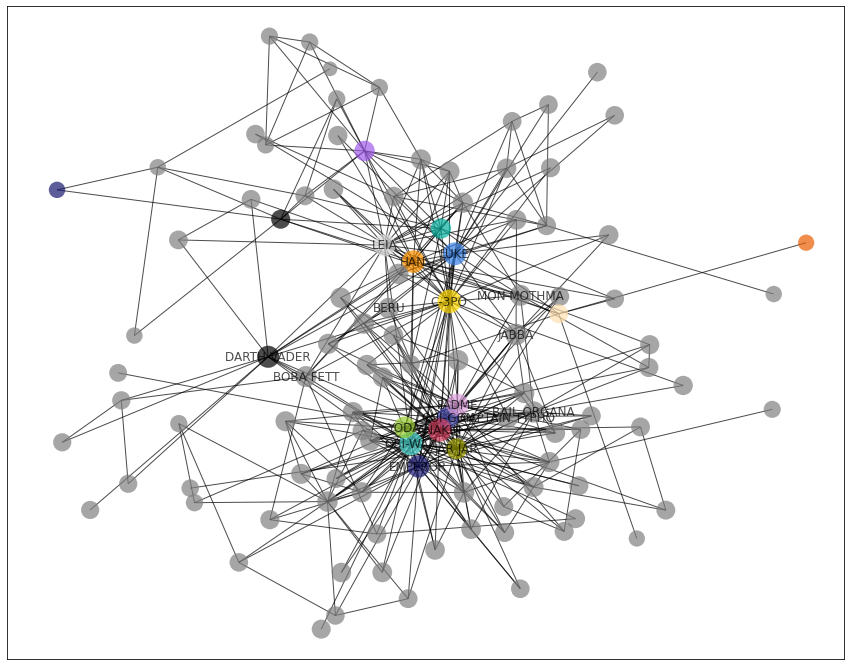

In [181]:
th = closeness_centrality_counts.most_common(20)[-1][1]
nx.draw_networkx(
    G, 
    node_color=clrs, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if closeness_centrality[n[0]] > th}, 
    node_size=np.array(list(closeness_centrality.values())) * 1000,
    linewidths=0.1,
    pos=pos,
)

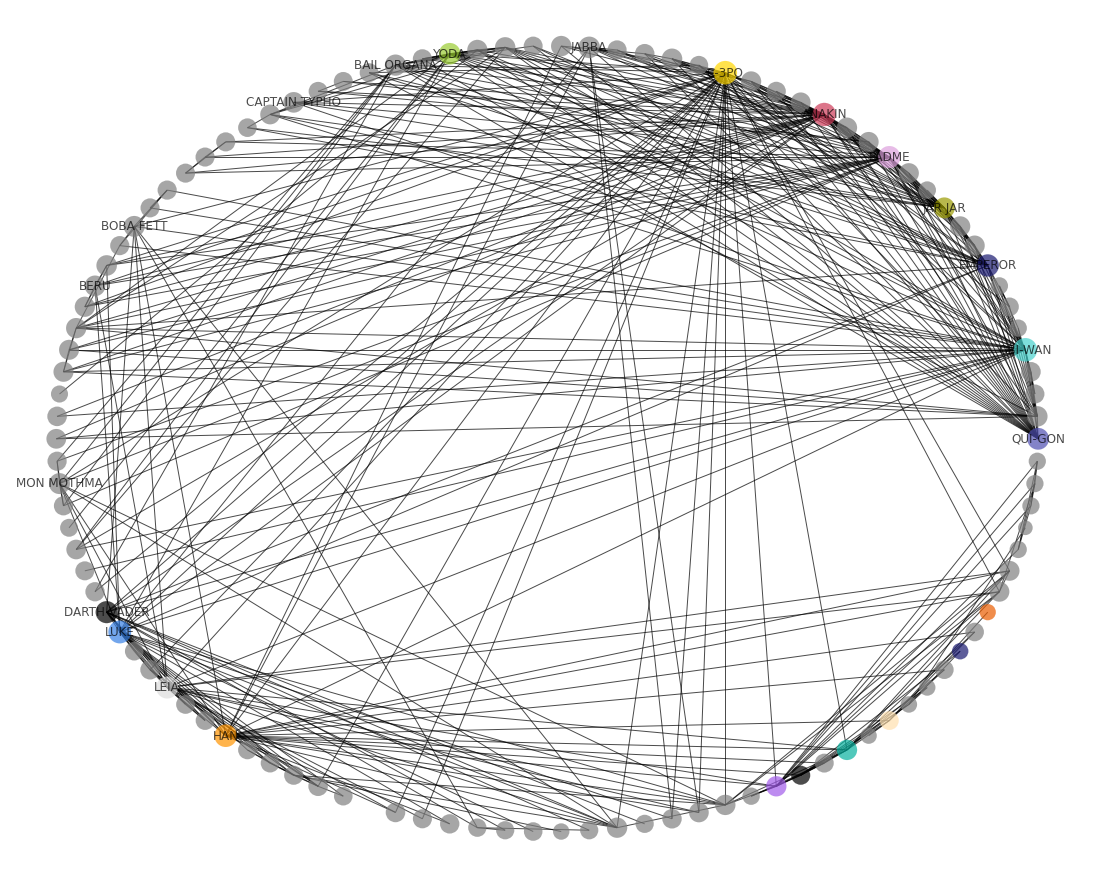

In [184]:
nx.draw_shell(
    G, 
    node_color=clrs, 
    with_labels=True, 
    alpha=0.7, 
    labels={n[0]: n[1]['name'] for n in G.nodes.data() if closeness_centrality[n[0]] > th}, 
    node_size=np.array(list(closeness_centrality.values())) * 1000,
    linewidths=0.1,
)

## Community detection

In [185]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
for c in communities:
    print('Community: ', ', '.join([G.nodes[n]['name'] for n in c]))

Community:  QUI-GON, NUTE GUNRAY, PK-4, TC-14, OBI-WAN, DOFINE, RUNE, TEY HOW, EMPEROR, CAPTAIN PANAKA, SIO BIBBLE, JAR JAR, TARPALS, BOSS NASS, PADME, RIC OLIE, WATTO, ANAKIN, SEBULBA, JIRA, SHMI, DARTH MAUL, KITSTER, WALD, FODE/BEED, JABBA, GREEDO, VALORUM, MACE WINDU, KI-ADI-MUNDI, YODA, RABE, BAIL ORGANA, GENERAL CEEL, BRAVO TWO, BRAVO THREE, CAPTAIN TYPHO, SENATOR ASK AAK, ORN FREE TAA, SOLA, JOBAL, RUWEE, TAUN WE, LAMA SU, JANGO FETT, OWEN, CLIEGG, COUNT DOOKU, SUN RIT, POGGLE, PLO KOON, ODD BALL, GENERAL GRIEVOUS, FANG ZAR, GIDDEAN DANU, CLONE COMMANDER GREE, CLONE COMMANDER CODY, TION MEDON
Community:  C-3PO, BOBA FETT, BERU, MON MOTHMA, CAPTAIN ANTILLES, DARTH VADER, LUKE, CAMIE, BIGGS, LEIA, MOTTI, TARKIN, HAN, DODONNA, GOLD LEADER, WEDGE, RED LEADER, RED TEN, RIEEKAN, DERLIN, ZEV, PIETT, OZZEL, DACK, JANSON, NEEDA, LANDO, JERJERROD, BIB FORTUNA, BOUSHH, ADMIRAL ACKBAR, FINN, UNKAR PLUTT, REY, BALA-TIK, MAZ, BB-8, SNAP, ADMIRAL STATURA
Community:  GOLD FIVE
Community:  LOR SA

### Поиск клик в графах

Часто исследовательские задачи стоят именно на поиск клик (например, проект по обнаружению коррупции. Они ищут таких подрядчиков, которые между собой связаны)

В теории графов кликой неориентированного графа называется подмножество его вершин, любые две из которых соединены ребром. 


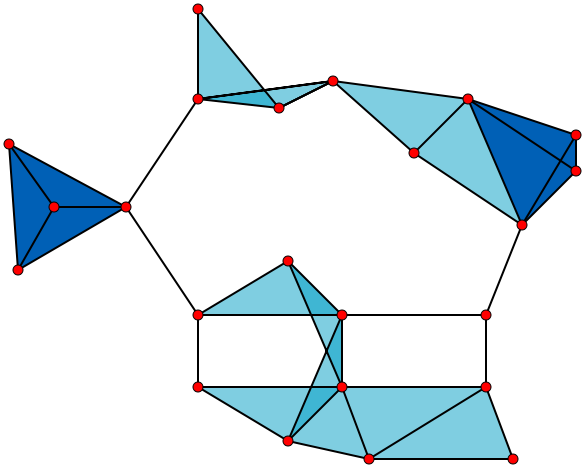

In [187]:
# https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html

for c in nx.find_cliques(G.to_undirected()):
    print(c, ', '.join([G.nodes[n]['name'] for n in c]))

[2, 3, 4] PK-4, TC-14, OBI-WAN
[3, 1, 0, 4] TC-14, NUTE GUNRAY, QUI-GON, OBI-WAN
[3, 1, 5] TC-14, NUTE GUNRAY, DOFINE
[5, 1, 7] DOFINE, NUTE GUNRAY, TEY HOW
[6, 1, 8, 22] RUNE, NUTE GUNRAY, EMPEROR, DARTH MAUL
[6, 1, 7] RUNE, NUTE GUNRAY, TEY HOW
[12, 11] TARPALS, JAR JAR
[17, 32, 0, 29, 30, 31] ANAKIN, RABE, QUI-GON, MACE WINDU, KI-ADI-MUNDI, YODA
[17, 64, 21, 48, 47] ANAKIN, LUKE, C-3PO, BERU, OWEN
[17, 64, 21, 26] ANAKIN, LUKE, C-3PO, JABBA
[17, 64, 21, 4, 8, 63] ANAKIN, LUKE, C-3PO, OBI-WAN, EMPEROR, DARTH VADER
[17, 64, 21, 4, 8, 31] ANAKIN, LUKE, C-3PO, OBI-WAN, EMPEROR, YODA
[17, 35, 36, 15] ANAKIN, BRAVO TWO, BRAVO THREE, RIC OLIE
[17, 14, 0, 1, 8, 10, 4] ANAKIN, PADME, QUI-GON, NUTE GUNRAY, EMPEROR, SIO BIBBLE, OBI-WAN
[17, 14, 0, 11, 18, 26, 20] ANAKIN, PADME, QUI-GON, JAR JAR, SEBULBA, JABBA, SHMI
[17, 14, 0, 11, 4, 8, 33, 29, 31] ANAKIN, PADME, QUI-GON, JAR JAR, OBI-WAN, EMPEROR, BAIL ORGANA, MACE WINDU, YODA
[17, 14, 0, 11, 4, 8, 10, 9] ANAKIN, PADME, QUI-GON, JAR JAR, OBI

## Упоминание про графовые базы данных 

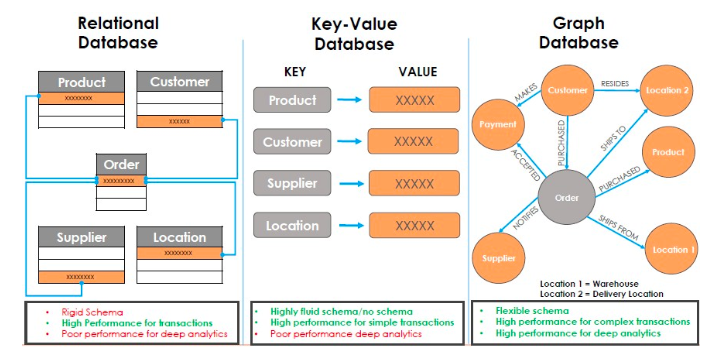

* OrientDB
* Neo4j
* Cassandra
* Amazon Neptune

https://aws.amazon.com/blogs/database/let-me-graph-that-for-you-part-1-air-routes/

## Статьи
1. Алгоритмы выделения сообществ. http://www.machinelearning.ru/wiki/images/8/8a/Nikishin_coursework_community_detection.pdf
2. Пример анализа зависимостей пакетов в pip. http://kgullikson88.github.io/blog/pypi-analysis.html
3. Книга Network science http://barabasi.com/networksciencebook/
4. Подборка материалов https://github.com/briatte/awesome-network-analysis


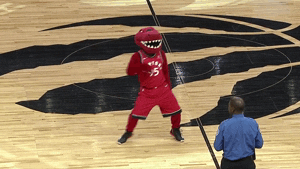